# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import openweathermapy as owm
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

settings = {"units": "imperial", "appid": api_key}

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [12]:
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | bayburt
http://api.openweathermap.org/data/2.5/weather?q=bayburt&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b


D:\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
D:\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
D:\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_valu

Processing Record 2 of Set 0 | sao filipe
http://api.openweathermap.org/data/2.5/weather?q=sao%20filipe&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 3 of Set 0 | barrow
http://api.openweathermap.org/data/2.5/weather?q=barrow&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 4 of Set 0 | mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 5 of Set 0 | san quintin
http://api.openweathermap.org/data/2.5/weather?q=san%20quintin&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 6 of Set 0 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 7 of Set 0 | mana
http://api.openweathermap.org/data/2.5/weather?q=mana&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 8 of Set 0 | port elizabeth
http://api.openweathermap.org/da

Processing Record 4 of Set 1 | chara
http://api.openweathermap.org/data/2.5/weather?q=chara&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 5 of Set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?q=vaitupu&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
HTTP Error 404: Not Found
Processing Record 6 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 7 of Set 1 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 8 of Set 1 | necochea
http://api.openweathermap.org/data/2.5/weather?q=necochea&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 9 of Set 1 | pisco
http://api.openweathermap.org/data/2.5/weather?q=pisco&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 10 of Set 1 | kishi
http://api.openweathermap.org/data

Processing Record 7 of Set 2 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto%20ayora&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 8 of Set 2 | bethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 9 of Set 2 | chepareria
http://api.openweathermap.org/data/2.5/weather?q=chepareria&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 10 of Set 2 | sataua
http://api.openweathermap.org/data/2.5/weather?q=sataua&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
HTTP Error 404: Not Found
Processing Record 11 of Set 2 | sechura
http://api.openweathermap.org/data/2.5/weather?q=sechura&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 12 of Set 2 | cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 13 of Set 2 | peniche
http://api.open

Processing Record 10 of Set 3 | santa vitoria do palmar
http://api.openweathermap.org/data/2.5/weather?q=santa%20vitoria%20do%20palmar&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 11 of Set 3 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 12 of Set 3 | anadyr
http://api.openweathermap.org/data/2.5/weather?q=anadyr&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 13 of Set 3 | hilo
http://api.openweathermap.org/data/2.5/weather?q=hilo&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 14 of Set 3 | bilma
http://api.openweathermap.org/data/2.5/weather?q=bilma&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 15 of Set 3 | naples
http://api.openweathermap.org/data/2.5/weather?q=naples&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 16 of Set 3 | ozinki
http://api.openweathermap.org/d

Processing Record 13 of Set 4 | port-cartier
http://api.openweathermap.org/data/2.5/weather?q=port-cartier&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 14 of Set 4 | limbang
http://api.openweathermap.org/data/2.5/weather?q=limbang&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 15 of Set 4 | richards bay
http://api.openweathermap.org/data/2.5/weather?q=richards%20bay&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 16 of Set 4 | kununurra
http://api.openweathermap.org/data/2.5/weather?q=kununurra&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 17 of Set 4 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial%20do%20cabo&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 18 of Set 4 | torbay
http://api.openweathermap.org/data/2.5/weather?q=torbay&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 19 of Set 4 | kazalinsk
http://a

Processing Record 16 of Set 5 | lata
http://api.openweathermap.org/data/2.5/weather?q=lata&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 17 of Set 5 | kavaratti
http://api.openweathermap.org/data/2.5/weather?q=kavaratti&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 18 of Set 5 | sorland
http://api.openweathermap.org/data/2.5/weather?q=sorland&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 19 of Set 5 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
HTTP Error 404: Not Found
Processing Record 20 of Set 5 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?q=sao%20joao%20da%20barra&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 21 of Set 5 | sokna
http://api.openweathermap.org/data/2.5/weather?q=sokna&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 22 of Set 5 | callaway

Processing Record 19 of Set 6 | chemal
http://api.openweathermap.org/data/2.5/weather?q=chemal&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 20 of Set 6 | tiruchchendur
http://api.openweathermap.org/data/2.5/weather?q=tiruchchendur&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 21 of Set 6 | tautira
http://api.openweathermap.org/data/2.5/weather?q=tautira&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 22 of Set 6 | palmer
http://api.openweathermap.org/data/2.5/weather?q=palmer&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 23 of Set 6 | motala
http://api.openweathermap.org/data/2.5/weather?q=motala&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 24 of Set 6 | nenjiang
http://api.openweathermap.org/data/2.5/weather?q=nenjiang&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 25 of Set 6 | dunedin
http://api.openweathermap.org/data/2.5/weather

Processing Record 21 of Set 7 | maputo
http://api.openweathermap.org/data/2.5/weather?q=maputo&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 22 of Set 7 | de-kastri
http://api.openweathermap.org/data/2.5/weather?q=de-kastri&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 23 of Set 7 | upata
http://api.openweathermap.org/data/2.5/weather?q=upata&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 24 of Set 7 | miranda de ebro
http://api.openweathermap.org/data/2.5/weather?q=miranda%20de%20ebro&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 25 of Set 7 | chulym
http://api.openweathermap.org/data/2.5/weather?q=chulym&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 26 of Set 7 | mobile
http://api.openweathermap.org/data/2.5/weather?q=mobile&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 27 of Set 7 | gull lake
http://api.openweathermap.org/data/2.5

Processing Record 24 of Set 8 | santa rosa
http://api.openweathermap.org/data/2.5/weather?q=santa%20rosa&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 25 of Set 8 | trofors
http://api.openweathermap.org/data/2.5/weather?q=trofors&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 26 of Set 8 | whitehorse
http://api.openweathermap.org/data/2.5/weather?q=whitehorse&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 27 of Set 8 | mackay
http://api.openweathermap.org/data/2.5/weather?q=mackay&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 28 of Set 8 | vostok
http://api.openweathermap.org/data/2.5/weather?q=vostok&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 29 of Set 8 | karatau
http://api.openweathermap.org/data/2.5/weather?q=karatau&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 30 of Set 8 | marcona
http://api.openweathermap.org/data/2.5/weath

Processing Record 27 of Set 9 | ouallam
http://api.openweathermap.org/data/2.5/weather?q=ouallam&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 28 of Set 9 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 29 of Set 9 | iqaluit
http://api.openweathermap.org/data/2.5/weather?q=iqaluit&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 30 of Set 9 | gostilitsy
http://api.openweathermap.org/data/2.5/weather?q=gostilitsy&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 31 of Set 9 | basoko
http://api.openweathermap.org/data/2.5/weather?q=basoko&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 32 of Set 9 | neyshabur
http://api.openweathermap.org/data/2.5/weather?q=neyshabur&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 33 of Set 9 | gualaco
http://api.openweathermap.org/data/2.5/weath

Processing Record 30 of Set 10 | kovernino
http://api.openweathermap.org/data/2.5/weather?q=kovernino&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 31 of Set 10 | raozan
http://api.openweathermap.org/data/2.5/weather?q=raozan&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
HTTP Error 404: Not Found
Processing Record 32 of Set 10 | shubarshi
http://api.openweathermap.org/data/2.5/weather?q=shubarshi&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 33 of Set 10 | roald
http://api.openweathermap.org/data/2.5/weather?q=roald&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 34 of Set 10 | hofn
http://api.openweathermap.org/data/2.5/weather?q=hofn&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 35 of Set 10 | mor
http://api.openweathermap.org/data/2.5/weather?q=mor&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 36 of Set 10 | opobo
http://api.openweathermap.org/data/

Processing Record 33 of Set 11 | chany
http://api.openweathermap.org/data/2.5/weather?q=chany&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 34 of Set 11 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?q=puerto%20baquerizo%20moreno&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 35 of Set 11 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?q=verkhoyansk&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 36 of Set 11 | bukachacha
http://api.openweathermap.org/data/2.5/weather?q=bukachacha&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 37 of Set 11 | nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 38 of Set 11 | hyeres
http://api.openweathermap.org/data/2.5/weather?q=hyeres&units=imperial&APPID=b68eb45caae0b73c6c1c0ab8ca34bc9b
Processing Record 39 of Set 11 | tizni

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
WeatherPy_df.count()


City          547
Cloudiness    547
Country       547
Date          547
Max Temp      547
Wind Speed    547
Lat           547
Lng           547
Humidity      547
dtype: int64

In [15]:
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Bayburt,83,TR,1561621191,60.9,6.8,40.26,40.22,79
1,Sao Filipe,0,CV,1561621192,74.22,24.23,14.9,-24.5,84
2,Barrow,100,AR,1561621142,46.32,15.66,-38.31,-60.23,49
3,Mataura,36,NZ,1561621192,50,4,-46.19,168.86,90
4,San Quintin,100,PH,1561621192,79.8,8.43,17.54,120.52,86
5,Srednekolymsk,33,RU,1561621193,69.36,20.98,67.46,153.71,32
6,Mana,0,NG,1561621193,87.54,14.85,13.03,5.27,55
7,Port Elizabeth,1,US,1561621193,75.2,6.93,39.31,-74.98,94
8,Jamestown,1,AU,1561621194,57.84,12.66,-33.21,138.6,60
9,Arlit,52,NE,1561620900,96.9,10.38,18.74,7.39,23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

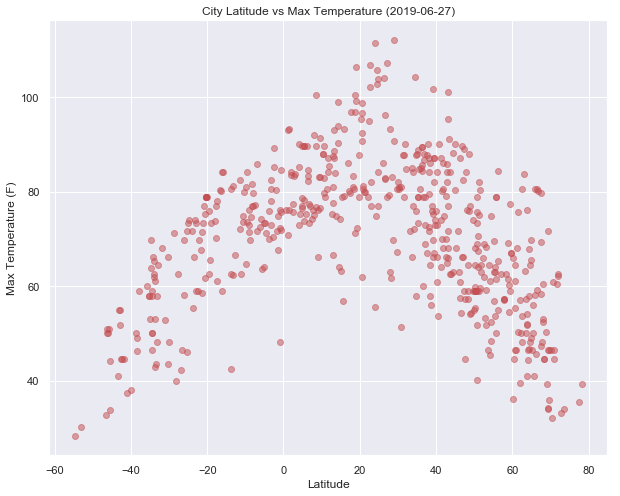

In [18]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

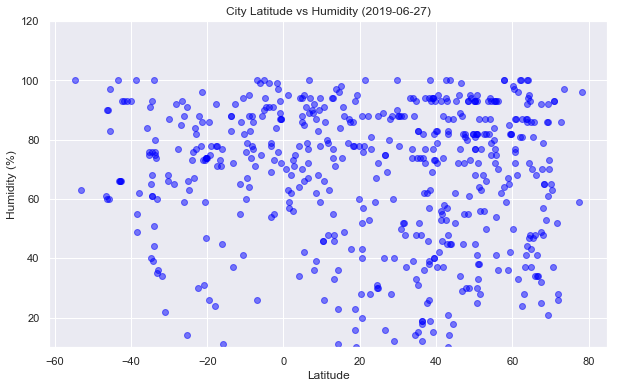

In [19]:
plt.figure(figsize=(10,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

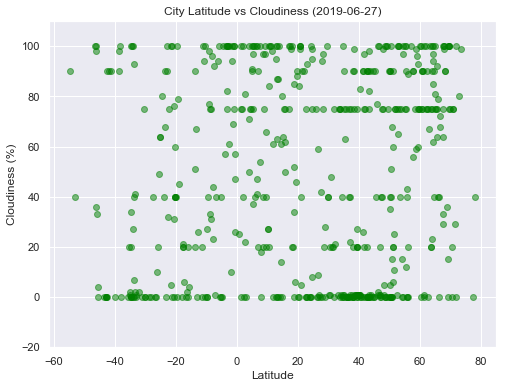

In [20]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

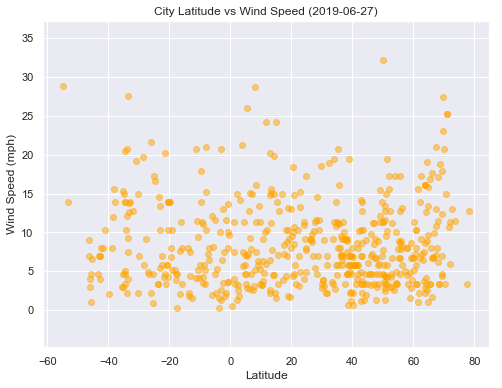

In [21]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='orange', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()